## Results Plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

from bbq.simulation import plot_results, process_results


In [ ]:
physical_error = np.logspace(-1.7, -0.7, 10)
ext_physical_error = np.logspace(-1, -0.8, 10)
new_ext_physical_error = np.hstack((ext_physical_error, np.logspace(-0.8, -0.64, 10)[1:7]))

noise_model = "code_capacity"
rounds = None


### BB Plots

In [ ]:
np.array([6292, 3547, 1712,  854,  355,  147,   51,   36,   30,   30]) + np.array([2968, 2603, 1140, 447, 272, 83, 32, 22, 20, 20])


array([9260, 6150, 2852, 1301,  627,  230,   83,   58,   50,   50])

In [ ]:
[9260, 6150, 2852, 1301,  627,  230,   83,   58,   50,   50]


[9260, 6150, 2852, 1301, 627, 230, 83, 58, 50, 50]

In [ ]:
np.array([19397,  7827,  2792,  1019,   334,   141,    63,    39,    32, 30]) + np.array([9308, 4829, 2871, 634, 333, 95, 43, 26, 20, 20])


array([28705, 12656,  5663,  1653,   667,   236,   106,    65,    52,
          50])

In [ ]:
[28705, 12656,  5663,  1653,   667,   236,   106,    65,    52,
          50]


[28705, 12656, 5663, 1653, 667, 236, 106, 65, 52, 50]

In [ ]:
results = {72: [4761, 2619, 1081, 424, 220, 130, 84, 63, 52, 50],
           108: [28705, 12656, 5663, 1653, 667, 236, 106, 65, 52, 50],
           144: [9260, 6150, 2852, 1301, 627, 230, 83, 58, 50, 50]}
num_failures = {72: 50,
                108: 50,
                144: 50}
scaled_results = {72 : np.array(results[72])*12, 
           108: np.array(results[108])*8, 
           144: np.array(results[144])*12}


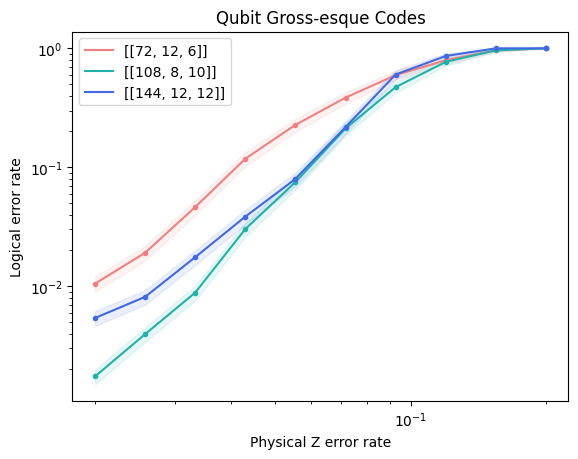

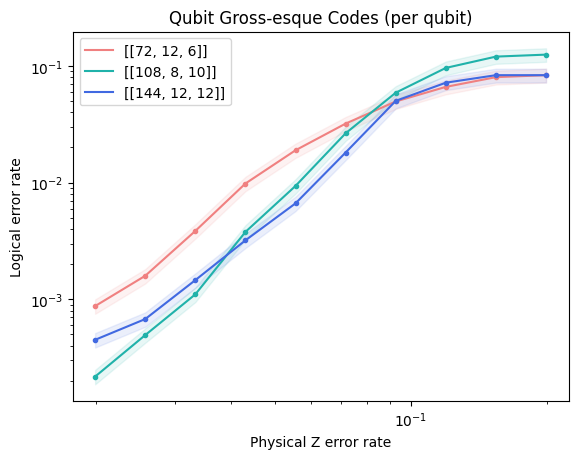

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, legend=['[[72, 12, 6]]', '[[108, 8, 10]]', '[[144, 12, 12]]'], title='Qubit Gross-esque Codes')
plot_results(physical_error, scaled_results, num_failures, noise_model, rounds, legend=['[[72, 12, 6]]', '[[108, 8, 10]]', '[[144, 12, 12]]'], title='Qubit Gross-esque Codes (per qubit)')


In [ ]:
results = {72: [1938, 1069, 433, 164, 101, 49, 34, 29, 21, 20],
           108: [9308, 4829, 2871, 634, 333, 95, 43, 26, 20, 20],
           144: [2968, 2603, 1140, 447, 272, 83, 32, 22, 20, 20],
           720: [539, 825, 711, 690, 477, 262, 182, 133, 104, 100],
           1080: [1087, 2127, 3800, 2539, 862, 353, 184, 138, 102, 100],
           1440: [2554, 5059, 7468, 4598, 1184, 399, 175, 115, 102, 100]}
num_failures = {72: 20,
                108: 20,
                144: 20,
                720: 100,
                1080: 100,
                1440: 100}


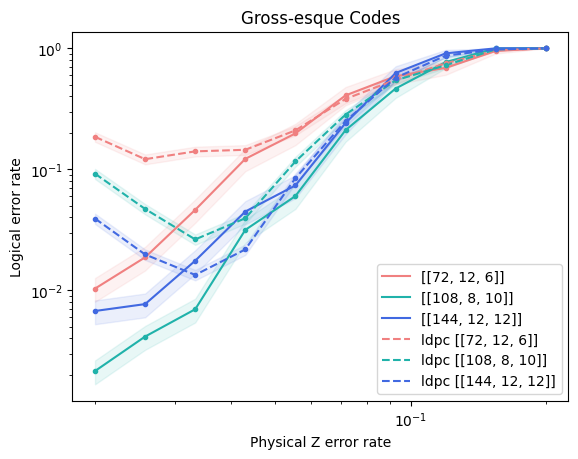

In [ ]:
plt_res, plot_error_bars = process_results(results, num_failures, noise_model, rounds)

fig, ax = plt.subplots()

ax.loglog(physical_error, plt_res[72], color='lightcoral')
ax.loglog(physical_error, plt_res[108], color='lightseagreen')
ax.loglog(physical_error, plt_res[144], color='royalblue')

ax.loglog(physical_error, plt_res[720], color='lightcoral', linestyle='--')
ax.loglog(physical_error, plt_res[1080], color='lightseagreen', linestyle='--')
ax.loglog(physical_error, plt_res[1440], color='royalblue', linestyle='--')

ax.loglog(physical_error, plt_res[72], '.', color='lightcoral')
ax.loglog(physical_error, plt_res[108], '.', color='lightseagreen')
ax.loglog(physical_error, plt_res[144], '.', color='royalblue')

ax.loglog(physical_error, plt_res[720], '.', color='lightcoral')
ax.loglog(physical_error, plt_res[1080], '.', color='lightseagreen')
ax.loglog(physical_error, plt_res[1440], '.', color='royalblue')

ax.fill_between(physical_error, plt_res[72] - plot_error_bars[72], plt_res[72] + plot_error_bars[72], color='lightcoral', alpha=0.1)
ax.fill_between(physical_error, plt_res[108] - plot_error_bars[108], plt_res[108] + plot_error_bars[108], color='lightseagreen', alpha=0.1)
ax.fill_between(physical_error, plt_res[144] - plot_error_bars[144], plt_res[144] + plot_error_bars[144], color='royalblue', alpha=0.1)

ax.fill_between(physical_error, plt_res[720] - plot_error_bars[720], plt_res[720] + plot_error_bars[720], color='lightcoral', alpha=0.1)
ax.fill_between(physical_error, plt_res[1080] - plot_error_bars[1080], plt_res[1080] + plot_error_bars[1080], color='lightseagreen', alpha=0.1)
ax.fill_between(physical_error, plt_res[1440] - plot_error_bars[1440], plt_res[1440] + plot_error_bars[1440], color='royalblue', alpha=0.1)

ax.legend(['[[72, 12, 6]]', '[[108, 8, 10]]', '[[144, 12, 12]]', 'ldpc [[72, 12, 6]]', 'ldpc [[108, 8, 10]]', 'ldpc [[144, 12, 12]]'])
ax.set_xlabel('Physical Z error rate')
ax.set_ylabel('Logical error rate')
ax.set_title('Gross-esque Codes');


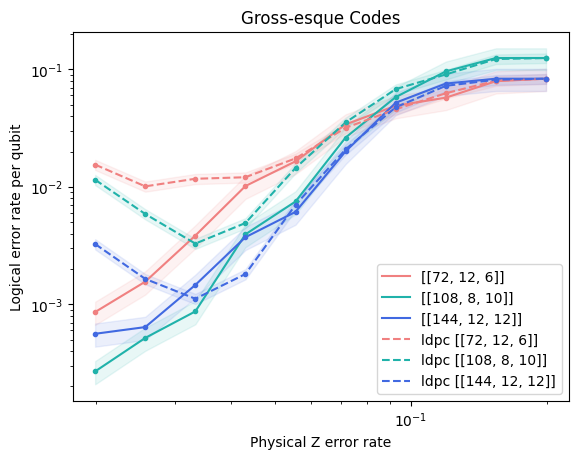

In [ ]:
results = {72 : np.array(results[72])*12, 
           108: np.array(results[108])*8, 
           144: np.array(results[144])*12,
           720: np.array(results[720])*12,
           1080: np.array(results[1080])*8,
           1440: np.array(results[1440])*12}

plt_res, plot_error_bars = process_results(results, num_failures, noise_model, rounds,)

fig, ax = plt.subplots()

ax.loglog(physical_error, plt_res[72], color='lightcoral')
ax.loglog(physical_error, plt_res[108], color='lightseagreen')
ax.loglog(physical_error, plt_res[144], color='royalblue')

ax.loglog(physical_error, plt_res[720], color='lightcoral', linestyle='--')
ax.loglog(physical_error, plt_res[1080], color='lightseagreen', linestyle='--')
ax.loglog(physical_error, plt_res[1440], color='royalblue', linestyle='--')

ax.loglog(physical_error, plt_res[72], '.', color='lightcoral')
ax.loglog(physical_error, plt_res[108], '.', color='lightseagreen')
ax.loglog(physical_error, plt_res[144], '.', color='royalblue')

ax.loglog(physical_error, plt_res[720], '.', color='lightcoral')
ax.loglog(physical_error, plt_res[1080], '.', color='lightseagreen')
ax.loglog(physical_error, plt_res[1440], '.', color='royalblue')

ax.fill_between(physical_error, plt_res[72] - plot_error_bars[72], plt_res[72] + plot_error_bars[72], color='lightcoral', alpha=0.1)
ax.fill_between(physical_error, plt_res[108] - plot_error_bars[108], plt_res[108] + plot_error_bars[108], color='lightseagreen', alpha=0.1)
ax.fill_between(physical_error, plt_res[144] - plot_error_bars[144], plt_res[144] + plot_error_bars[144], color='royalblue', alpha=0.1)

ax.fill_between(physical_error, plt_res[720] - plot_error_bars[720], plt_res[720] + plot_error_bars[720], color='lightcoral', alpha=0.1)
ax.fill_between(physical_error, plt_res[1080] - plot_error_bars[1080], plt_res[1080] + plot_error_bars[1080], color='lightseagreen', alpha=0.1)
ax.fill_between(physical_error, plt_res[1440] - plot_error_bars[1440], plt_res[1440] + plot_error_bars[1440], color='royalblue', alpha=0.1)

ax.legend(['[[72, 12, 6]]', '[[108, 8, 10]]', '[[144, 12, 12]]', 'ldpc [[72, 12, 6]]', 'ldpc [[108, 8, 10]]', 'ldpc [[144, 12, 12]]'])
ax.set_xlabel('Physical Z error rate')
ax.set_ylabel('Logical error rate per qubit')
ax.set_title('Gross-esque Codes');


In [ ]:
results = {72: [11710, 2629, 2958, 1076, 264, 126, 54, 39, 23, 20],
           108: [13856, 5626, 1187, 938, 312, 320, 75, 34, 22, 20],
           144: [5345, 2031, 1064, 1055, 492, 137, 62, 36, 23, 20]}
num_failures = {72: 20,
                108: 20,
                144: 20}
scaled_results = {72 : np.array(results[72])*8, 
           108: np.array(results[108])*8, 
           144: np.array(results[144])*8}


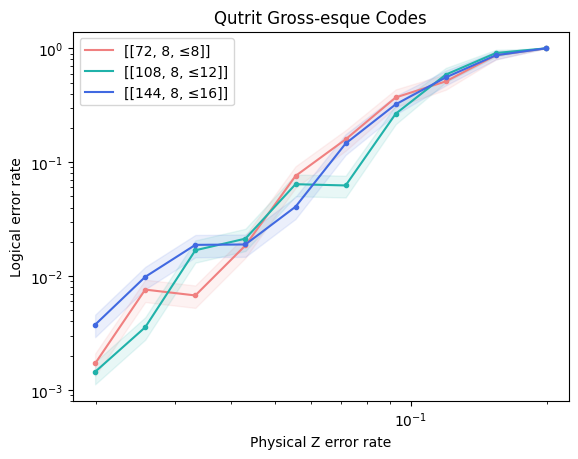

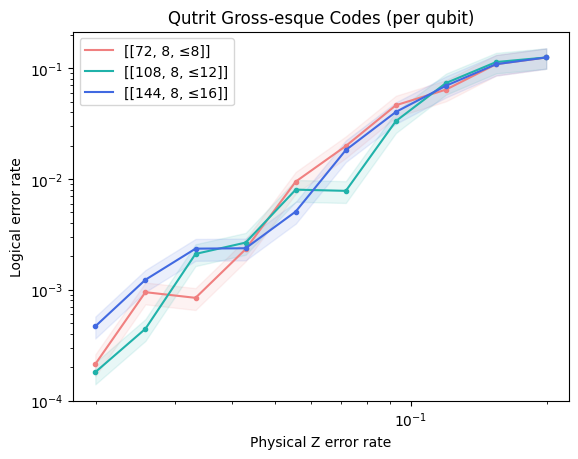

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, legend=['[[72, 8, ≤8]]', '[[108, 8, ≤12]]', '[[144, 8, ≤16]]'], title='Qutrit Gross-esque Codes')
plot_results(physical_error, scaled_results, num_failures, noise_model, rounds, legend=['[[72, 8, ≤8]]', '[[108, 8, ≤12]]', '[[144, 8, ≤16]]'], title='Qutrit Gross-esque Codes (per qubit)')


In [ ]:
results = {72: [10893, 6927, 3950, 1264, 934, 431, 136, 78, 30, 22],
           108: [20897, 7585, 4549, 1876, 1520, 576, 236, 83, 31, 27],
           144: [12321, 4979, 2421, 1960, 844, 341, 169, 109, 42, 22]}
num_failures = {72: 20,
                108: 20,
                144: 20}
scaled_results = {72 : np.array(results[72])*8, 
           108: np.array(results[108])*8, 
           144: np.array(results[144])*8}


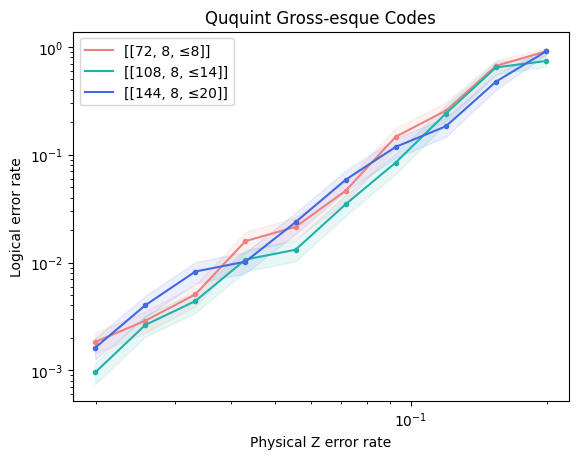

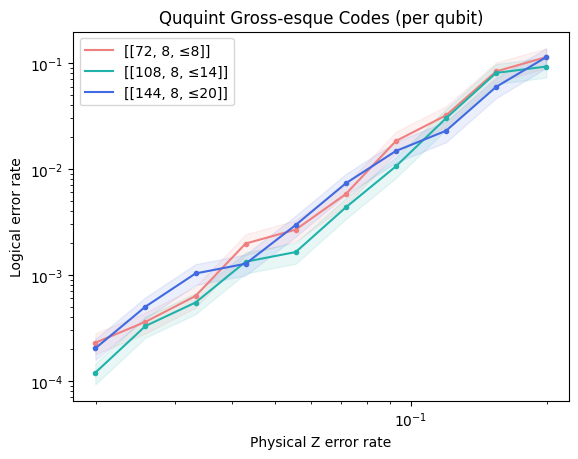

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, legend=['[[72, 8, ≤8]]', '[[108, 8, ≤14]]', '[[144, 8, ≤20]]'], title='Ququint Gross-esque Codes')
plot_results(physical_error, scaled_results, num_failures, noise_model, rounds, legend=['[[72, 8, ≤8]]', '[[108, 8, ≤14]]', '[[144, 8, ≤20]]'], title='Ququint Gross-esque Codes (per qubit)')


### Toric Code Plots

In [ ]:
results = {3: [938, 627, 227, 135, 107, 76, 42, 40, 36, 16],
           5: [8591, 2295, 1436, 428, 260, 93, 42, 29, 18, 13],
           7: [28624, 10266, 3814, 909, 317, 177, 67, 33, 14, 16]}
num_failures = {3: 10,
                5: [8, 8, 10, 10, 10, 10, 10, 10, 10, 10],
                7: [8, 8, 8, 10, 10, 10, 10, 10, 10, 10]}

ext_results = {3: [379, 365, 373, 336, 357, 306, 297, 277, 232, 217],
           5: [413, 389, 374, 362, 260, 240, 242, 208, 211, 210],
           7: [476, 411, 315, 320, 259, 239, 242, 176, 203, 163]}
ext_num_failures = {3: 100,
                5: 100,
                7: 100}


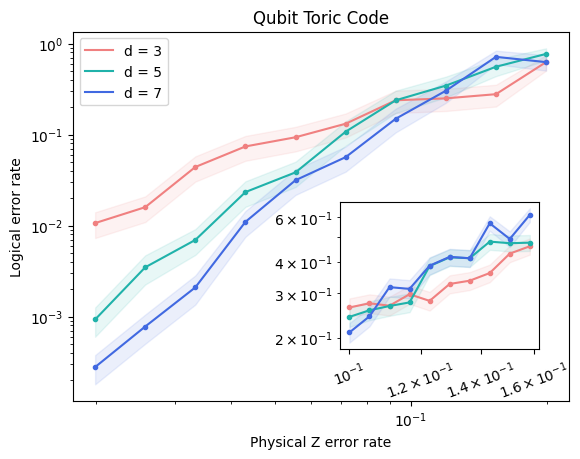

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, ext_physical_error, ext_results, ext_num_failures, legend=['d = 3', 'd = 5', 'd = 7'], title='Qubit Toric Code')


In [ ]:
results = {3: [1069, 995, 582, 497, 130, 77, 82, 50, 28, 17],
           5: [10343, 4288, 5109, 916, 522, 286, 151, 35, 22, 19],
           7: [np.inf, 22596, 7571, 5280, 2138, 494, 142, 49, 20, 17]}
num_failures = {3: 10,
                5: [5, 5, 10, 10, 10, 10, 10, 10, 10, 10],
                7: [1, 5, 5, 10, 10, 10, 10, 10, 10, 10]}

ext_results = {3: [1135, 1080, 886, 922, 763, 683, 639, 606, 546, 570],
           5: [1638, 1198, 1214, 950, 856, 722, 652, 564, 501, 534],
           7: [2084, 1869, 1480, 1167, 991, 884, 692, 624, 466, 433]}
ext_num_failures = {3: 200,
                5: 200,
                7: 200}


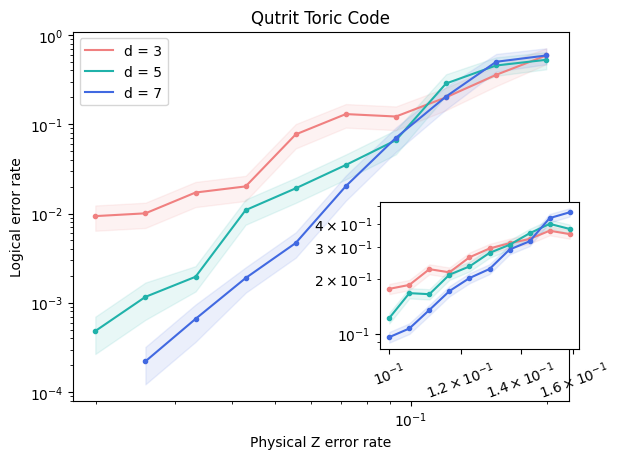

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, ext_physical_error, ext_results, ext_num_failures, legend=['d = 3', 'd = 5', 'd = 7'], title='Qutrit Toric Code', inset_dim = [0.62, 0.14, 0.4, 0.4])


In [ ]:
results = {3: [3400, 892, 381, 464, 274, 178, 69, 64, 24, 24],
           5: [11757, 4746, 4313, 2786, 703, 293, 168, 89, 46, 21],
           7: [np.inf, np.inf, 14800, 9497, 4218, 1676, 682, 156, 56, 19]}
num_failures = {3: 10,
                5: [5, 5, 10, 10, 10, 10, 10, 10, 10, 10],
                7: [0, 0, 3, 5, 10, 10, 10, 10, 10, 10]}

ext_results = {3: [1351, 1269, 1141, 1012, 794, 793, 699, 708, 608, 570, 605, 532, 483, 488, 477, 414],
           5: [1674, 2661, 1940, 1864, 1566, 1350, 1179, 1135, 1190, 1016, 657, 572, 569, 469, 509, 391],
           7: [2978, 4783, 4465, 3803, 3028, 2201, 1592, 1275, 1089, 921, 1152, 955, 874, 722, 651, 573]}
ext_num_failures = {3: 200,
                5: [116, 200, 200, 200, 200, 200, 200, 217, 273, 273, 200, 200, 200, 200, 200, 200],
                7: [100, 169, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300]}


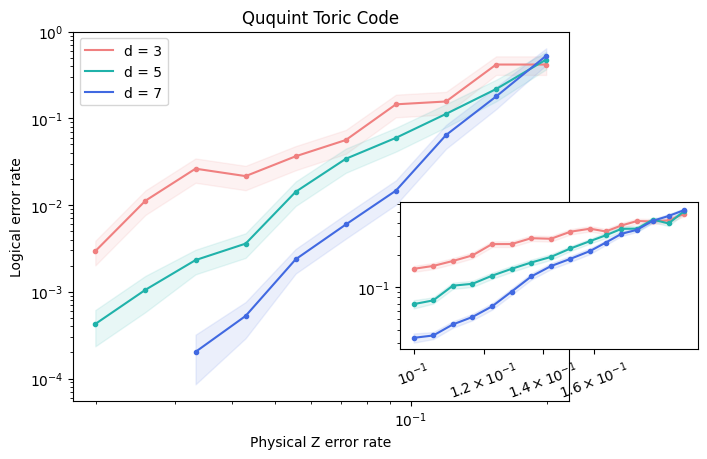

In [ ]:
plot_results(physical_error, results, num_failures, noise_model, rounds, new_ext_physical_error, ext_results, ext_num_failures, legend=['d = 3', 'd = 5', 'd = 7'], title='Ququint Toric Code', inset_dim = [0.66, 0.14, 0.6, 0.4])
